<a href="https://colab.research.google.com/github/mibarthur/test/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   hourstr  counts
0       00   35658
1       01   33491
2       02   35771
3       03   35477
4       04   27565
5       05   25976
6       06   24034
7       07   18089
8       08   17886
9       09   20394
10      10   21622
11      11   21471
12      12   26410
13      13   28382
14      14   32354
15      15   36020
16      16   35441
17      17   36780
18      18   42169
19      19   45798
20      20   44982
21      21   49200
22      22   41575
23      23   42183


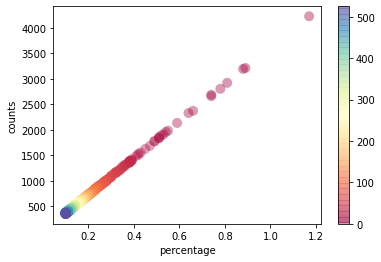

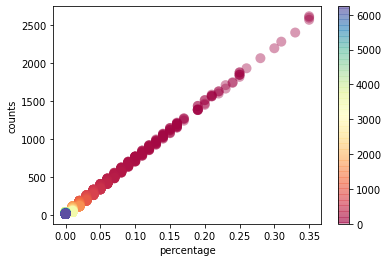

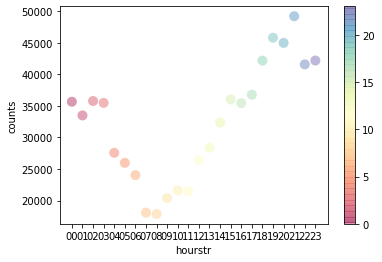

In [2]:
# -*- coding: utf-8 -*- 
""" 
Spyder Editor 
 
This is a temporary script file. 
""" 
 
import pandas as pd 
from datetime import datetime  
import csv 
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import cm 
 
#file_path = 'D:/download/ml-20m/ml-20m/' 
file_path = '/content/' 
 
 
 
ratings_data = pd.read_csv(file_path+'ratings.csv',sep=',') 
#tags_data = pd.read_csv(file_path+'tags.csv',sep=',') 
movies_data = pd.read_csv(file_path+'movies.csv',sep=',') 
#genome_scores_data = pd.read_csv(file_path+'genome-scores.csv',sep=') 
#genome_tags_data = pd.read_csv(file_path+'genome-tags.csv',sep=',') 
#ratings_data.head() 
 
#moviesWithTags_data = pd.merge(movies_data, tags_data, on='movieId', how='left') 
moviesWithRatings_data = pd.merge(movies_data, ratings_data, on='movieId', how='left') 
#moviesWithAll_data = pd.merge(moviesWithTags_data,moviesWithRatings_data,on=['movieId','title','genres'], how='outer') 
#moviesWithRatings_data['userId'].value_counts().to_frame() 
 
 
 
 
def showPercentageUseGroupby(df, groupbyColName, countColName): 
    #做群組, 然後出現的次數 
    df_data = df.groupby(groupbyColName)[countColName].count().reset_index(name='counts') 
  
    #前N%的數量 
    tenPercentRatingsCount = df_data[countColName].count() // 10 
     
    #print(tenPercentRatingsCount) 
 
    #排序counts(大至小) 
    df_data = df_data.sort_values(by='counts', ascending=False).iloc[:tenPercentRatingsCount] 
    #print(userId_data) 
 
 
    total=df_data['counts'].sum() 
    #print(moviesWithRatingstotal) 
 
    #記算percentage, 並加入df 
    df_data['percentage']=round((df_data['counts']*100)/total,2) 
    #print(userId_data) 
 
    #df_data.to_csv(file_path+'topTenValuesMovie.csv') 
    #moviesWithRatingscounts_data.plot.title('使用者評等次數分佈圖') 
 
    cmap=cm.get_cmap('Spectral') 
    fig, ax=plt.subplots() 
 
    #ax.set_xlim(df_data['percentage'].iloc[-1]*0.8, df_data['percentage'].iloc[0]*1.1) 
    #ax.set_ylim(df_data['counts'].iloc[-1]*0.8, df_data['counts'].iloc[0]*1.1) 
    df_data.plot('percentage', 'counts', kind='scatter', ax=ax, 
                 s=100, alpha=0.4, c=range(len(df_data)),  
                 linewidth=0, colormap=cmap) 
     
    #for index, row in df_data.iterrows(): 
    #    ax.annotate(row[countColName], xy=(row['percentage'], row['counts']), xytext=(-10,5),  
    #                textcoords='offset points', xycoords='data', size=8, color='darkslategrey', 
    #                ha='center', va='bottom', alpha=0.5) 
    #userId_data.plot.scatter(x='percentage', y='counts', alpha=0.4, style='o') 
    #fig.canvas.draw() 
         
      #  , bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3), 
       #         arrowprops=dict(arrowstyle='->',connectionstyle='ar3,rad=0.5',color='red') 
    #plt.show() 
 
#以userId做群組  ==> Q2 
showPercentageUseGroupby(moviesWithRatings_data, 'userId', 'userId') 
 
#以movieId做群組 ==> Q3 
showPercentageUseGroupby(moviesWithRatings_data, 'movieId', 'movieId') 
     
#取出timestampe的小時, 並加入df 
 
#print(moviesWithRatings_data['hourstr']) 
 
 
def Q4(df, colName): 
    #做群組, 然後出現的次數 
    df_data = df.groupby(colName)[colName].count().reset_index(name='counts') 
  
    #排序counts(大至小) 
    df_data = df_data.sort_values(by=colName, ascending=True) 
    print(df_data) 
 
 
    #df_data.to_csv(file_path+'topTenValuesMovie.csv') 
    #moviesWithRatingscounts_data.plot.title('使用者評等次數分佈圖') 
 
    cmap=cm.get_cmap('Spectral') 
    fig, ax=plt.subplots() 
 
    df_data.plot('hourstr', 'counts', kind='scatter', ax=ax, 
                 s=100, alpha=0.4, c=range(len(df_data)),  
                 linewidth=0, colormap=cmap) 
 
 
moviesWithRatings_data['hourstr'] = pd.to_datetime(moviesWithRatings_data['timestamp'],unit='s').dt.strftime('%H') 
Q4(moviesWithRatings_data, 'hourstr') 
 
#showPercentageUseGroupby(moviesWithRatings_data, 'hour', 'userId', '前10%使用者百分比', '評等次數') 
 
 
#moviesWithRatingscounts_data.plot.show()') 
#moviesWithRatingscounts_data.plot.xlabel='前10%評等百分' 
#moviesWithRatingscounts_data.plot.ylabel='評等次數' 
#moviesWithRatingscounts_data.plot.show() 
 
#moviesWithRatingscounts_data.plot.scatter( 
#    x='percentage', y='userIdCounts', alpha=0.5, c=rgb) 
 
#fig = plt.figure() 
#plt.plot(x='percentage', y='userIdCounts', 'r.') 
#plt.xlabel('百分比', fontsize=18) 
#plt.ylabel('評等次數', fontsize=18) 
 
#print(moviesWithRatingscounts_data.iloc(tenPercentRatingsCount)) 
#tenPercentRatings_data = moviesWithRatingscounts_data.DataFrame(columns=[]) 
#tenPercentageRatingsData = '{:.1f%}'.format(tenPercentRatingsData.Series(index=1)) 
#print(tenPercentRatings_data) 
 
 
#_tenPercentRatingsData.plot.line() 
#moviesWithRatings_counts. 
 
 
 
#print(moviesWithAll_data) 
 
#moviesWithTags_data.to_csv(file_path+'moviesWithTags.csv') 
#moviesWithRatings_data.to_csv(file_path+'moviesWithRatings.csv') 
  
 
#rating_time=datetime.fromtimestamp(timestamp) 
#dt = datetime.strftime("%Y/%m/%d(%週w) %H:%M:%S")